### Multi-Fidelity

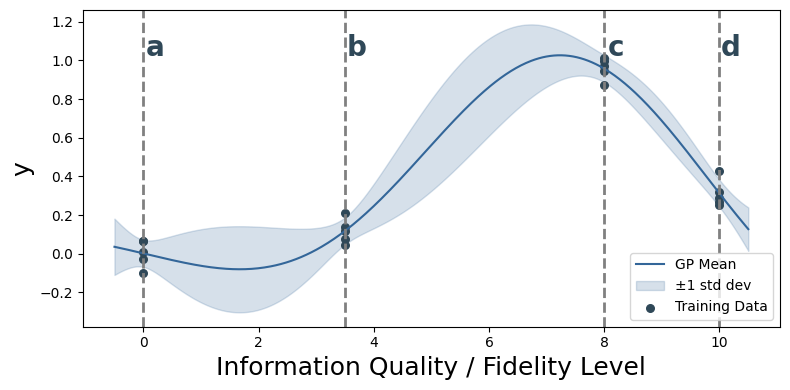

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Create training data
x_base = np.array([0, 3.5, 8.0, 10.0]) 
x_train = np.repeat(x_base, 5) 
y_train = np.sin(x_train)**2 + 0.05 * np.random.randn(len(x_train))  
X_train = x_train.reshape(-1, 1)

# Define GP kernel
kernel = RBF(length_scale=0.5) + WhiteKernel(noise_level=0.02)

# Fit GP model
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X_train, y_train)

# Predict over a range of x values
X_test = np.linspace(-0.5, 10.5, 500).reshape(-1, 1)
y_mean, y_std = gp.predict(X_test, return_std=True)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(X_test, y_mean, '#336699', label='GP Mean')
plt.fill_between(X_test.ravel(), y_mean - y_std, y_mean + y_std,
                 color='#336699', alpha=0.2, label='±1 std dev')
plt.scatter(X_train, y_train, c='#2F4858', label='Training Data', s=30)

# Add vertical markers and labels
x_labels = ['a', 'b', 'c', 'd']
for i, x in enumerate(x_base):
    plt.axvline(x, color='gray', linestyle='--', linewidth=2)
    plt.text(x+0.2, plt.ylim()[1]*0.9, x_labels[i], ha='center', 
             va='top', fontsize=20, color='#2F4858', weight="bold")

# Formatting
plt.xlabel("Information Quality / Fidelity Level", size=18)
plt.ylabel("y", size=18)
plt.legend(loc="lower right")
plt.grid(False)
plt.tight_layout()
plt.savefig(fname="plots/multi_fidelity_example.pdf")
plt.show()


### Case studies

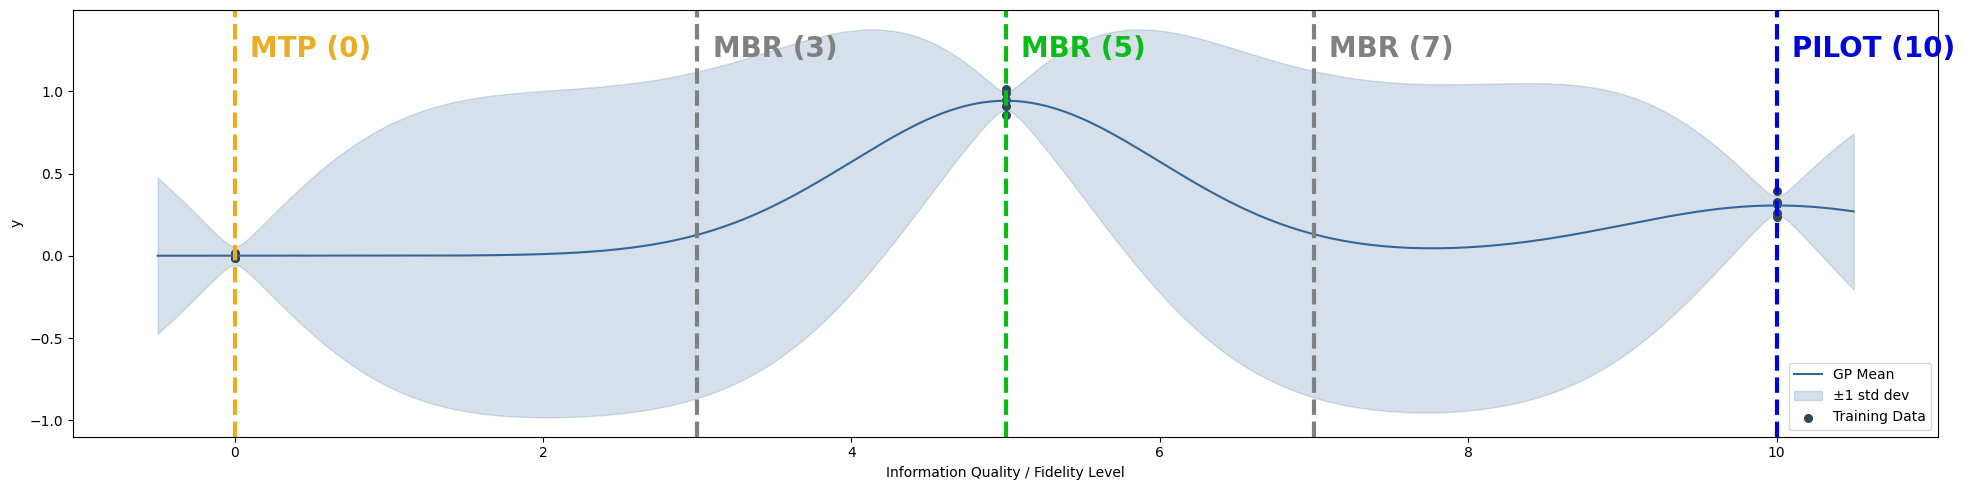

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Create training data
x_base = np.array([0, 5.0, 10.0])
x_train = np.repeat(x_base, 5) 
y_train = np.sin(x_train)**2 + 0.05 * np.random.randn(len(x_train)) 
X_train = x_train.reshape(-1, 1)

# Define GP kernel
kernel = RBF(length_scale=1) + WhiteKernel(noise_level=0.05)

# Fit GP model
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X_train, y_train)

# Predict over a range of x values
X_test = np.linspace(-0.5, 10.5, 500).reshape(-1, 1)
y_mean, y_std = gp.predict(X_test, return_std=True)

# Plot
plt.figure(figsize=(20, 5))
plt.plot(X_test, y_mean, '#336699', label='GP Mean')
plt.fill_between(X_test.ravel(), y_mean - y_std, y_mean + y_std, 
                 color='#336699', alpha=0.2, label='±1 std dev')
plt.scatter(X_train, y_train, c='#2F4858', label='Training Data', s=30)

# Add vertical markers and labels
x_labels = ['MTP (0)', 'MBR (5)', 'PILOT (10)']
colors = ['#EAAC23', '#09BC17', '#0008D8']
for i, x in enumerate(x_base):
    plt.axvline(x, color=colors[i], linestyle='--', linewidth=3)
    plt.text(x+0.1, plt.ylim()[1]*0.9, x_labels[i], ha='left', 
             va='top', fontsize=20, color=colors[i], weight="bold")

plt.axvline(3, color='gray', linestyle='--', linewidth=3)
plt.axvline(7, color='gray', linestyle='--', linewidth=3)
plt.text(3+0.1, plt.ylim()[1]*0.9, "MBR (3)", ha='left', 
         va='top', fontsize=20, color='gray', weight="bold")
plt.text(7+0.1, plt.ylim()[1]*0.9, "MBR (7)", ha='left', 
         va='top', fontsize=20, color='gray', weight="bold")

# Formatting
plt.xlabel("Information Quality / Fidelity Level")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.grid(False)
plt.tight_layout()
plt.savefig(fname="plots/case_study_mbr_level.pdf")
plt.show()


### pH Influence Plot

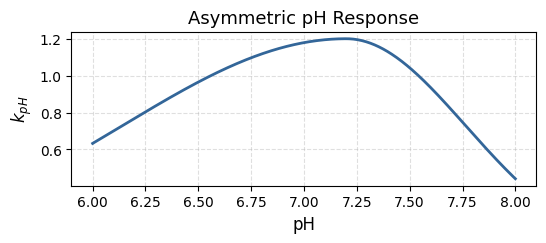

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define constants
A = 1.2      # Amplitude factor
E_a = 7.2     # Mean temperature

# Define the function
def plot_function(T, A, E_a):
    x = T  
    mu = E_a

    left_part = np.exp(-1 * ((x - mu) / 1.5)**2)
    right_part = np.exp(-1 * ((x - mu) / 0.8)**2) # Sharper decay on the right 

    factor = A * np.where(x < mu, left_part, right_part)
    factor = np.clip(factor, 0.3, None)
    return factor

# Define temperature range
T_range = np.linspace(6, 8, 500) 
y_values = plot_function(T_range, A, E_a)

# Create figure
plt.figure(figsize=(6, 2))  # Adjusted size for paper
plt.plot(T_range, y_values, color="#336699", linewidth=2)

# Labeling
plt.xlabel("pH", fontsize=12)
plt.ylabel(r"$k_{pH}$", fontsize=12)
plt.title("Asymmetric pH Response", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
#plt.tight_layout()

# Save for paper
#plt.savefig("plots/pH_response.pdf")  # Uncomment to save

plt.show()

